In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re

In [2]:
def HLA_cd8_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace(",", "").replace("'","").split(" ")

def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def epitope_converter(x):
    #define format of datetime
    return [y for y in x.replace("[","").replace("]","").replace("\n","").split("'") if (y != '') & (y != ' ')]

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("\n","").replace("'",""))

def literal_converter(val):
    # replace NaN with '' and perform literal eval on the rest
    return [] if val == '' else literal_eval(val)

converters = {'peptide_HLA_lst': peptide_hla_converter,
              'umi_count_lst_mhc': literal_eval,
              'umi_count_lst_TRA': literal_converter,'umi_count_lst_TRB': literal_converter,
              'cdr3_lst_TRA': cdr3_lst_converter,
              'cdr3_lst_TRB': cdr3_lst_converter,
              'HLA_lst_mhc': cdr3_lst_converter,'HLA_cd8': HLA_cd8_converter} #

# Input

In [3]:
MHC = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv'

In [4]:
TCR = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv'

# Load

In [5]:
mhc_df = pd.read_csv(MHC, converters=converters)

In [6]:
tcr_df = pd.read_csv(TCR)

In [7]:
tcr_df.columns

Index(['barcode', 'is_cell', 'contig_id', 'high_confidence', 'length', 'chain',
       'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive',
       'fwr1', 'fwr1_nt', 'cdr1', 'cdr1_nt', 'fwr2', 'fwr2_nt', 'cdr2',
       'cdr2_nt', 'fwr3', 'fwr3_nt', 'cdr3', 'cdr3_nt', 'fwr4', 'fwr4_nt',
       'reads', 'umis', 'raw_clonotype_id', 'raw_consensus_id',
       'exact_subclonotype_id'],
      dtype='object')

In [63]:
meta_alt = tcr_df[tcr_df.is_cell == True].groupby('barcode').raw_clonotype_id.unique().apply(lambda x: x[0]).str.split('clonotype').str[1].astype(int).to_frame()

In [64]:
meta_alt

,raw_clonotype_id
barcode,
AAACCTGAGAGGTAGA-1,2
AAACCTGAGCACCGTC-1,1
AAACCTGAGCCAGGAT-1,10
AAACCTGAGGAGCGTT-1,1
AAACCTGAGTAATCCC-1,5
...,...
TTTGTCACATGAAGTA-1,17
TTTGTCAGTACAGCAG-1,3
TTTGTCAGTCCAGTTA-1,4


In [8]:
v_gene = tcr_df.pivot_table(index='barcode',columns='v_gene',values='umis',aggfunc='max')
d_gene = tcr_df.pivot_table(index='barcode',columns='d_gene',values='umis',aggfunc='max')
j_gene = tcr_df.pivot_table(index='barcode',columns='j_gene',values='umis',aggfunc='max')
c_gene = tcr_df.pivot_table(index='barcode',columns='c_gene',values='umis',aggfunc='max')
cdr1 = tcr_df.pivot_table(index='barcode',columns='cdr1',values='umis',aggfunc='max')
cdr2 = tcr_df.pivot_table(index='barcode',columns='cdr2',values='umis',aggfunc='max')
cdr3 = tcr_df.pivot_table(index='barcode',columns='cdr3',values='umis',aggfunc='max')

In [48]:
v_gene = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='v_gene',values='umis',aggfunc='max')
d_gene = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='d_gene',values='umis',aggfunc='max')
j_gene = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='j_gene',values='umis',aggfunc='max')
c_gene = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='c_gene',values='umis',aggfunc='max')
cdr1 = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='cdr1',values='umis',aggfunc='max')
cdr2 = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='cdr2',values='umis',aggfunc='max')
cdr3 = tcr_df[tcr_df.is_cell == True].pivot_table(index='barcode',columns='cdr3',values='umis',aggfunc='max')

In [49]:
tcr_t = pd.concat([v_gene, j_gene, cdr3], axis=1)

In [50]:
tcr_t

,TRAV1-1,TRAV1-2,TRAV10,TRAV12-1,TRAV12-2,TRAV12-3,TRAV13-1,TRAV13-2,TRAV14/DV4,TRAV16,...,CVVSARMDSSYKLIF,CVVSELGYYKGTYKYIF,CVVSENYGGSQGNLIF,CVVSPFSDGQKLLF,CVVTLPTGFQKLVF,CVVTPSNDYKLSF,CVVVIVYQLIW,CVVYAAFYDYKLSF,CWAGSGGGADGLTF,CYGGGYGQNFVF
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAGGTAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCACCGTC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCCAGGAT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGGAGCGTT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTAATCCC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATGAAGTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCAGTACAGCAG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCAGTCCAGTTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mhc_df['zipped'] = mhc_df.apply(lambda row: list(zip(row.peptide_HLA_lst, row.umi_count_lst_mhc)), axis=1)

In [12]:
tmp = mhc_df.explode('zipped')
tmp[['p','u']] = pd.DataFrame(tmp.zipped.tolist(), index=tmp.index)

In [13]:
mhc_t = tmp.pivot_table(index='gem', columns='p', values='u')

In [14]:
mhc_t

p,AALPGVPPV A0201,AIFCAIQNL A0201,ALPGVPPV A0201,ALPGVPPVPA A0201,AMLIRDRL B0801,ATTADVDAGSL A0101,AYLTNQYM A2401,AYRAALGASL B0702,CSSVDIHF A0101,DEYVHNTTA B0801,...,WPRAPRGQ B0702,WPRAPRGQI B0801,WPRAPRGQIP B0702,WPRAPRGQIPL B0702,YADYSYAI B0801,YLFHKEPTW A0201,YLFHKEPTWES A0201,YPLVKMRL B0801,YPLVKMRLS B0702,YPLVKMRLSV B0702
gem,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAGGTAGA-1,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCACCGTC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGGAGCGTT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTCGAGTG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCATACTACG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACATTCGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCACATCCAACA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTCACATGAAGTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = pd.merge(mhc_t, tcr_t, how='outer', left_index=True, right_index=True)

In [16]:
df.to_csv('all_data.csv')

In [17]:
meta_data = pd.merge(df, mhc_df[['gem','peptide_HLA','ct','num_clonotype']].set_index('gem',drop=True), how='outer', left_index=True, right_index=True)

In [18]:
credible_mhc = mhc_df[(mhc_df.umi_count_mhc >= 17) & (mhc_df.delta_umi_mhc >= 2) & (mhc_df.delta_umi_TRB >= 2)]

In [19]:
meta_data = meta_data.merge(credible_mhc[['gem','peptide_HLA','ct','num_clonotype']].set_index('gem',drop=True), how='outer', left_index=True, right_index=True, suffixes=('','_cred'))

In [20]:
meta_data[['peptide_HLA','ct','num_clonotype','peptide_HLA_cred','ct_cred','num_clonotype_cred']].to_csv('meta.csv')

In [39]:
meta_data['pH'] = meta_data.peptide_HLA.map(dict(zip(meta_data.peptide_HLA.unique(), np.arange(len(meta_data.peptide_HLA.unique())))))

In [40]:
meta_data

,AALPGVPPV A0201,AIFCAIQNL A0201,ALPGVPPV A0201,ALPGVPPVPA A0201,AMLIRDRL B0801,ATTADVDAGSL A0101,AYLTNQYM A2401,AYRAALGASL B0702,CSSVDIHF A0101,DEYVHNTTA B0801,...,CWAGSGGGADGLTF,CWAMYSGGGADGLTF,CYGGGYGQNFVF,peptide_HLA,ct,num_clonotype,peptide_HLA_cred,ct_cred,num_clonotype_cred,pH
AAACCTGAGAGGTAGA-1,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RAKFKQLL B0801,2.0,2.0,RAKFKQLL B0801,2.0,2.0,0
AAACCTGAGCACCGTC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VTEHDTLLY A0101,1.0,1.0,NaN,NaN,NaN,1
AAACCTGAGCCAGGAT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
AAACCTGAGGAGCGTT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RAKFKQLL B0801,1.0,1.0,NaN,NaN,NaN,0
AAACCTGAGTAATCCC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATGAAGTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VTEHDTLLY A0101,29.0,17.0,NaN,NaN,NaN,1
TTTGTCAGTACAGCAG-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RAKFKQLL B0801,3.0,3.0,NaN,NaN,NaN,0
TTTGTCAGTCCAGTTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,EERQAYLTNQY A0101,6.0,4.0,NaN,NaN,NaN,8
TTTGTCAGTGAGGCTA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [46]:
meta_data.pH.value_counts()

2     2525
1     1054
0      754
5      203
8      127
      ... 
37       1
41       1
45       1
61       1
67       1
Name: pH, Length: 69, dtype: int64

In [67]:
meta_alt.raw_clonotype_id.value_counts()

1      1043
2       934
3       415
4       220
5       112
       ... 
448       1
446       1
444       1
442       1
521       1
Name: raw_clonotype_id, Length: 522, dtype: int64

In [25]:
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import matplotlib.pyplot as plt

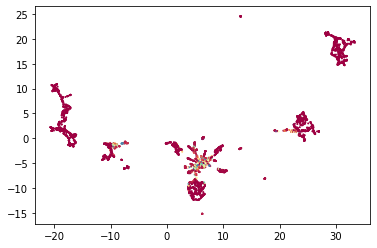

In [69]:
standard_embedding = umap.UMAP(n_neighbors=15, min_dist=0.2, metric='euclidean').fit_transform(tcr_t.fillna(0))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=meta_alt.raw_clonotype_id.astype(int), s=1, cmap='Spectral');

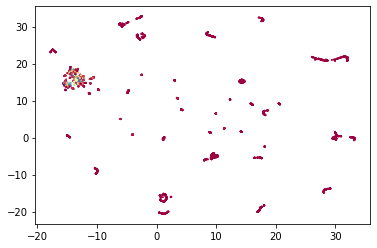

In [70]:
standard_embedding = umap.UMAP(n_neighbors=30, metric='canberra').fit_transform(tcr_t.fillna(0))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=meta_alt.raw_clonotype_id.astype(int), s=1, cmap='Spectral');

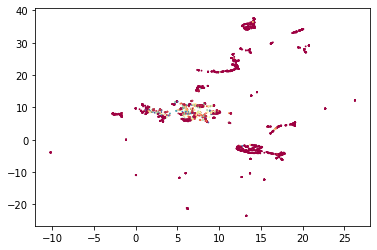

In [71]:
standard_embedding = umap.UMAP(n_neighbors=30, metric='braycurtis').fit_transform(tcr_t.fillna(0))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=meta_alt.raw_clonotype_id.astype(int),s=0.7, cmap='Spectral');

In [32]:
meta_data.num_clonotype.fillna(0).astype(int).value_counts()

0      2741
2       575
1       496
3       185
4       177
       ... 
317       1
321       1
329       1
333       1
511       1
Name: num_clonotype, Length: 294, dtype: int64